In this article, we will learn to predict the survival chances of the Titanic passengers using the given information about their sex, age, etc. As this is a classification task we will be using random forest.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR, SVC
from tabulate import tabulate



In [2]:
# We have those 2 columns that are about the train and the test, and we want to predict ig=f the passenger in the test column will survive or no 

In [3]:
df=pd.read_csv('train.csv')
df

# SibSp is a data that define the familial relation

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# Checking for the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Checking if there is a duplicate

df.duplicated().sum()

0

In [7]:
df.shape

(891, 12)

In [8]:
# checking of the null value 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Dealing with the missing value such as age and cabin
# For numerical columns: Impute missing values using the mean of the column.
# For categorical columns: Impute missing values using the most frequent category (mode).





# Assuming `train` is your DataFrame

# 1. Impute missing values for 'Age' using the median
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# 2. Create 'CabinBool' column for 'Cabin' missing values
df['CabinBool'] = df['Cabin'].notnull().astype(int)

# Fill missing 'Cabin' values with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# 3. Impute missing values for 'Embarked' using the most frequent value (mode)
embarked_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']]).flatten()



C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\1984183918.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)


In [10]:
# checking for the missing value 

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
CabinBool      0
dtype: int64

In [11]:


# Delete the column 'Cabin' from test and train dataset
df = df.drop(['Cabin'], axis=1)


In [12]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinBool
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,0.228956
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,0.420397
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,0.000000


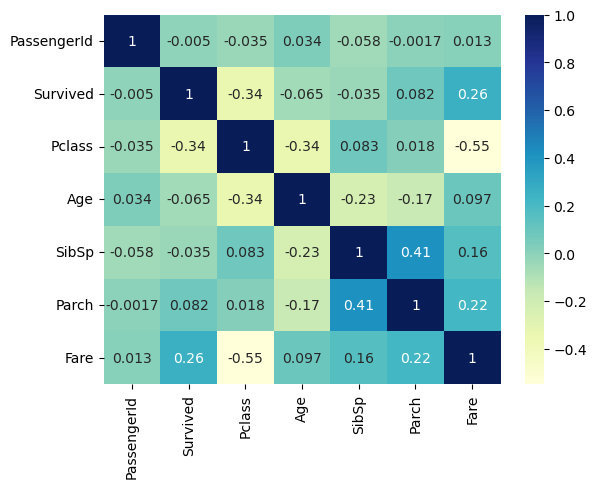

In [13]:

# Select only the numerical columns from the dataset
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# View the correlation matrix as a heatmap
sns.heatmap(numeric_data.corr(), cmap='YlGnBu', annot=True)
plt.show()


The lower number in pclass , the higher the  survive is

In [14]:
# 1. Extract Titles from the 'Name' column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\4061229650.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [15]:
# 2. Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   CabinBool  891 non-null    int32  
 9   Title      891 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 66.3+ KB


In [16]:
# 3. Create 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the person themselves



In [17]:
# View the updated dataset
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,0,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs,2
2,1,3,female,26.0,0,0,7.9250,S,0,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,0,Mr,1
5,0,3,male,28.0,0,0,8.4583,Q,0,Mr,1
6,0,1,male,54.0,0,0,51.8625,S,1,Mr,1
7,0,3,male,2.0,3,1,21.0750,S,0,Master,5
8,1,3,female,27.0,0,2,11.1333,S,0,Mrs,3
9,1,2,female,14.0,1,0,30.0708,C,0,Mrs,2


- Mr.: Adult male
- Mrs.: Married female
- Miss.: Unmarried female
- Master.: Young male

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   CabinBool   891 non-null    int32  
 9   Title       891 non-null    object 
 10  FamilySize  891 non-null    int64  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 73.2+ KB


In [19]:
# Convert specified columns to categorical type
df['Sex'] = df['Sex'].astype('category')

df['Embarked'] = df['Embarked'].astype('category')
df['Title'] = df['Title'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    category
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    891 non-null    category
 8   CabinBool   891 non-null    int32   
 9   Title       891 non-null    category
 10  FamilySize  891 non-null    int64   
dtypes: category(3), float64(2), int32(1), int64(5)
memory usage: 55.9 KB


In [20]:
# Replace 'male' and 'female' with 0 and 1, then convert to int
df["Sex"] = df["Sex"].replace(["male", "female"], [0, 1]).astype(int)

# Check the data types
df.info()


C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\436737572.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace(["male", "female"], [0, 1]).astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    int32   
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    891 non-null    category
 8   CabinBool   891 non-null    int32   
 9   Title       891 non-null    category
 10  FamilySize  891 non-null    int64   
dtypes: category(2), float64(2), int32(2), int64(5)
memory usage: 58.4 KB


C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\436737572.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Sex"] = df["Sex"].replace(["male", "female"], [0, 1]).astype(int)


EDA

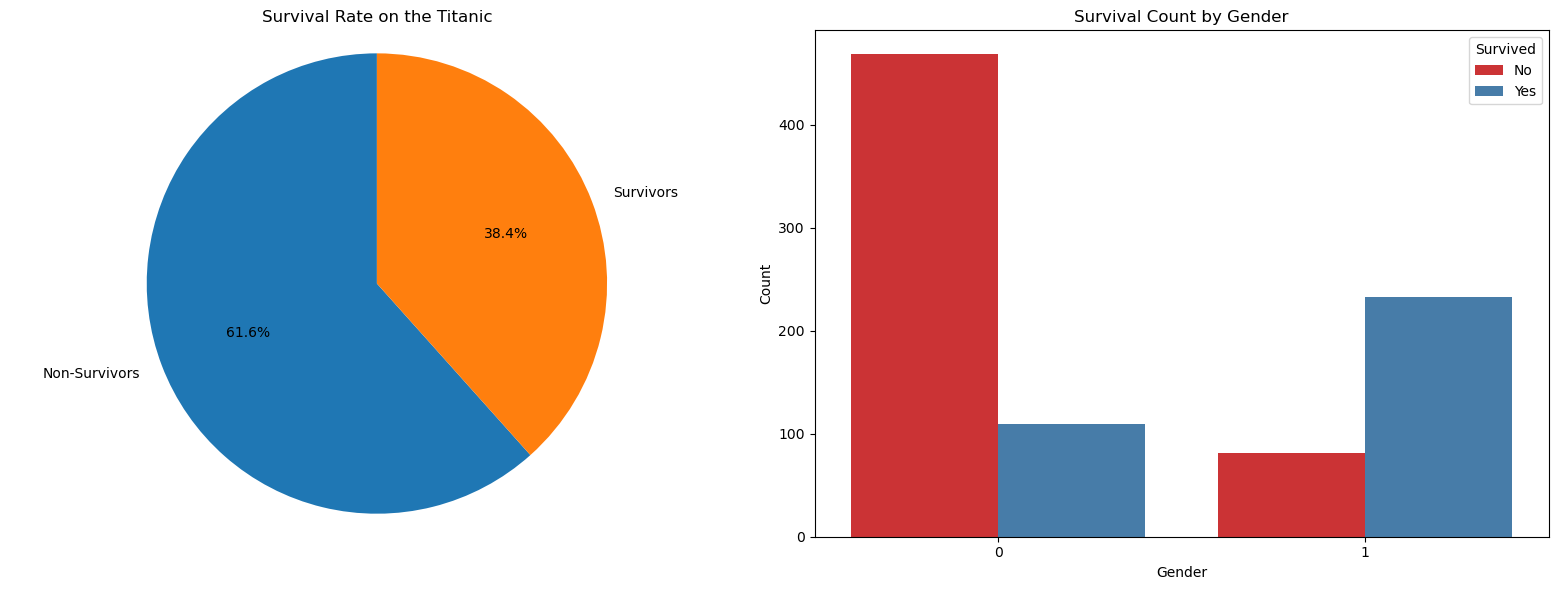

In [21]:

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(16, 6))

# 1. Pie chart for survival rate
plt.subplot(1, 2, 1)
survival_counts = df['Survived'].value_counts()
plt.pie(survival_counts, labels=['Non-Survivors', 'Survivors'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate on the Titanic')
plt.axis('equal')

# 2. Bar plot for survival count by gender
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Show the plots
plt.tight_layout()
plt.show()


C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\406157803.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, palette='Set2')
C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\406157803.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, palette='Set2')
C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\406157803.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, palette='Set2')
C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\406157803.py:10: FutureWarnin

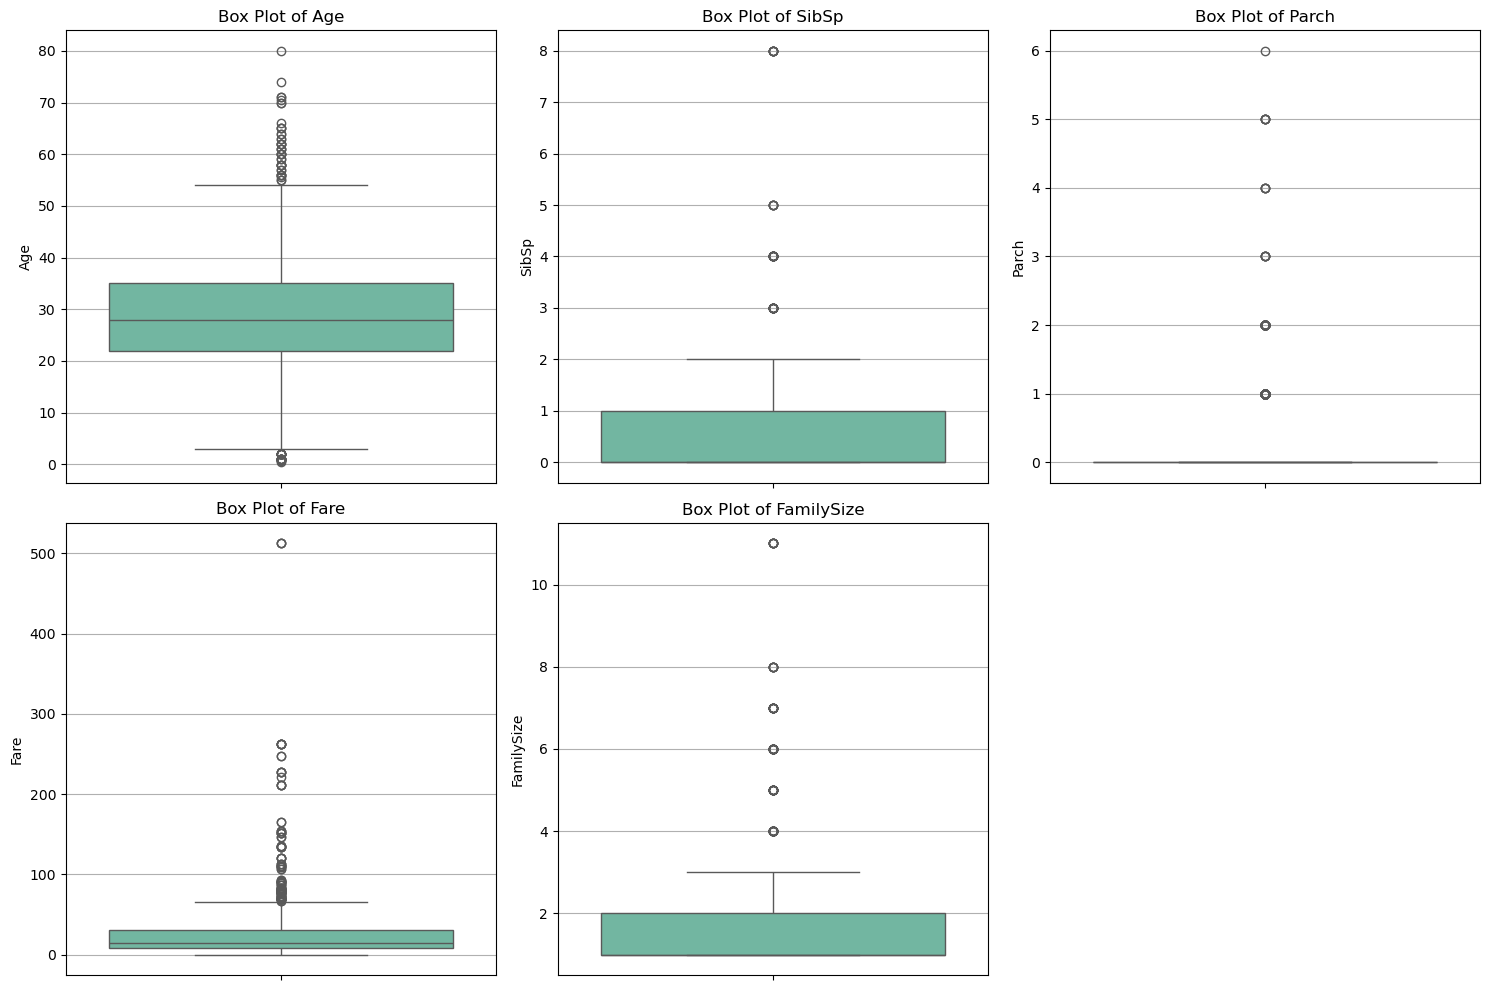

In [22]:


# Set the size for the plots
plt.figure(figsize=(15, 10))

# List of numerical columns to plot
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the grid as needed
    sns.boxplot(data=df, y=column, palette='Set2')
    plt.title(f'Box Plot of {column}')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()





The number of males that has been dead is higher then the number of womens and the same thing is for who lived

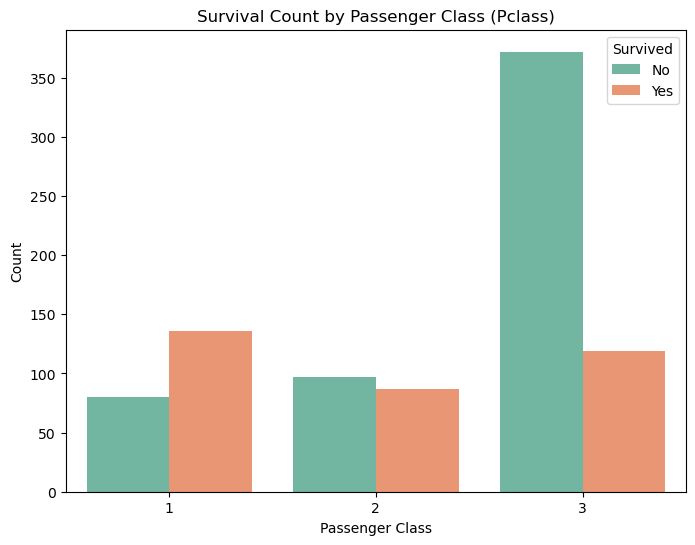

In [23]:


# Create a bar plot for survival count by passenger class
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set2')
plt.title('Survival Count by Passenger Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


The passenger of the 3rd class have the best chance to survive

C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\3183109734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Title', palette='Set3', order=df['Title'].value_counts().index)


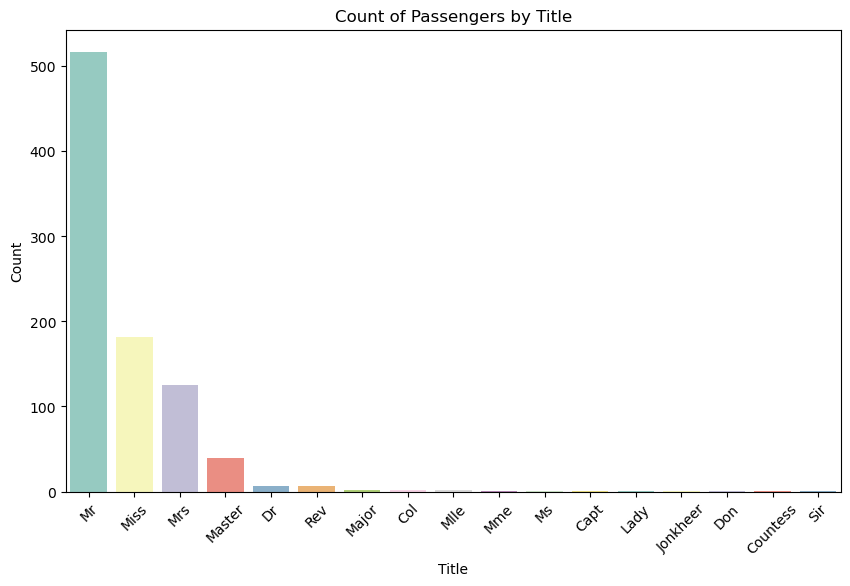

In [24]:


# Create a bar plot for the count of passengers by title
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Title', palette='Set3', order=df['Title'].value_counts().index)
plt.title('Count of Passengers by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\1134825523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette='Set2')


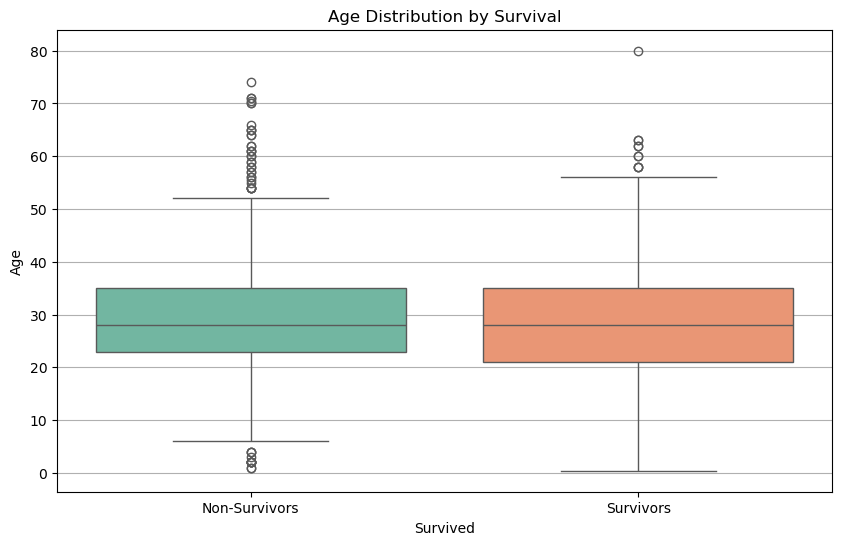

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Age', palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.grid(axis='y')
plt.show()




C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\2498514627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set2')


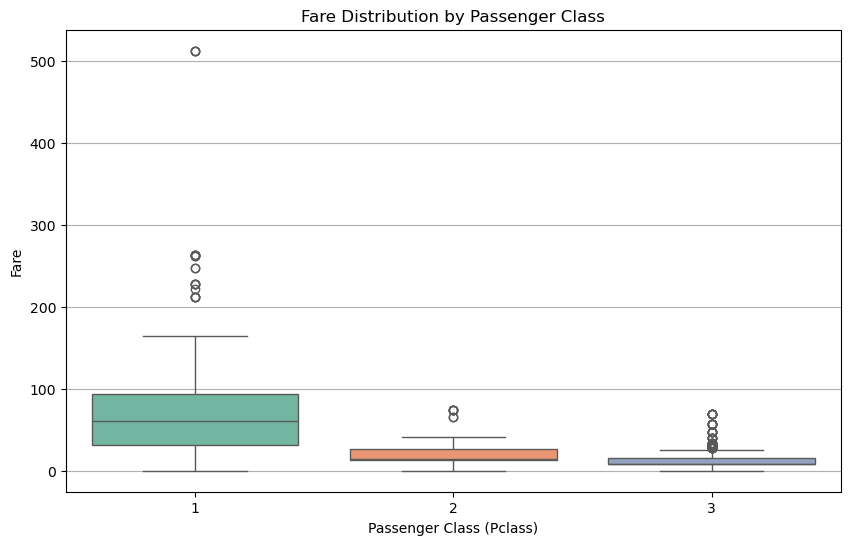

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set2')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Fare')
plt.grid(axis='y')
plt.show()


C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\3004225523.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y='Fare', palette='muted')
C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\3004225523.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y='Age', palette='muted')


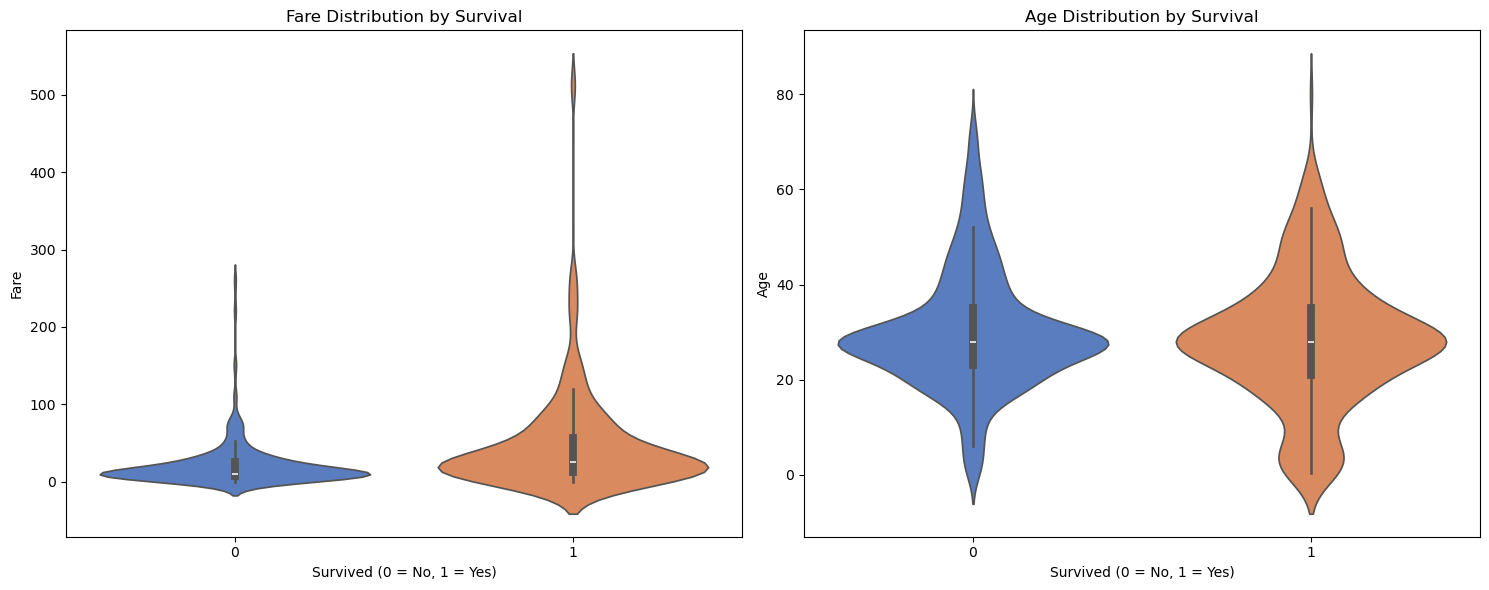

In [27]:


# Set up the figure size
plt.figure(figsize=(15, 6))

# Violin plot for Fare by Survival
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='Survived', y='Fare', palette='muted')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')

# Violin plot for Age by Survival
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='Survived', y='Age', palette='muted')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Fare ya3ni ujra
- The most who survived is below 40 

C:\Users\Khoder Asmar\AppData\Local\Temp\ipykernel_2416\4245167758.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=family_survival, x='FamilySize', y='Survived', palette='muted')


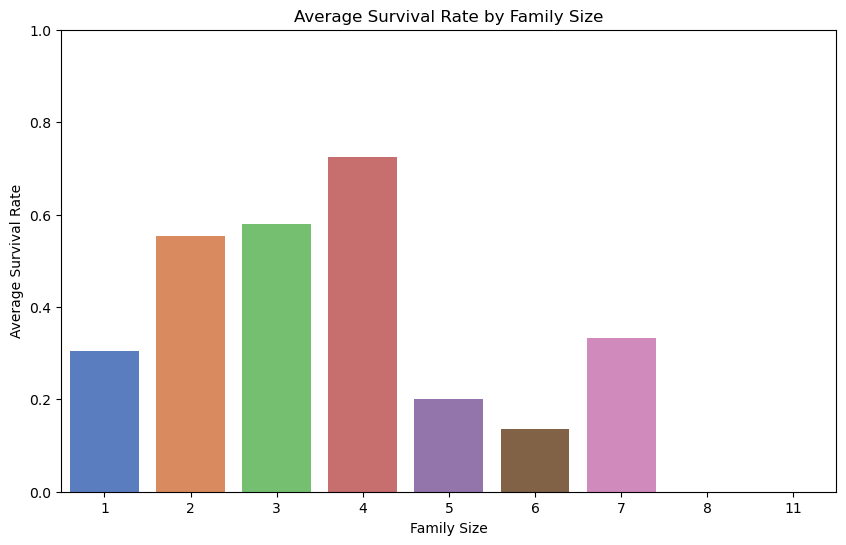

In [28]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Calculate the mean survival rate for each family size
family_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()

# Create a bar plot
sns.barplot(data=family_survival, x='FamilySize', y='Survived', palette='muted')

# Add titles and labels
plt.title('Average Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Average Survival Rate')
plt.ylim(0, 1)  # Set y-axis limit to show percentage

# Show the plot
plt.show()


In [29]:
# Assuming 'train' is your DataFrame
summary_stats = df.describe()

# Function to calculate IQR bounds
def calculate_outlier_bounds(column):
    Q1 = summary_stats.loc['25%', column]
    Q3 = summary_stats.loc['75%', column]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Dictionary to store the bounds for each column
outlier_bounds = {}

# List of columns to check for outliers
columns_to_check = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

# Calculate and store the bounds
for column in columns_to_check:
    lower, upper = calculate_outlier_bounds(column)
    outlier_bounds[column] = (lower, upper)

# Display the outlier bounds for each variable
for column, bounds in outlier_bounds.items():
    print(f"{column}: Lower bound = {bounds[0]:.2f}, Upper bound = {bounds[1]:.2f}")

# Optionally, you can find the actual outliers
for column, bounds in outlier_bounds.items():
    outliers = df[(df[column] < bounds[0]) | (df[column] > bounds[1])]
    print(f"Outliers in {column}:")
    outliers


Age: Lower bound = 2.50, Upper bound = 54.50
Fare: Lower bound = -26.72, Upper bound = 65.63
SibSp: Lower bound = -1.50, Upper bound = 2.50
Parch: Lower bound = 0.00, Upper bound = 0.00
FamilySize: Lower bound = -0.50, Upper bound = 3.50
Outliers in Age:
Outliers in Fare:
Outliers in SibSp:
Outliers in Parch:
Outliers in FamilySize:


In [30]:
# Assuming 'train' is your DataFrame and outlier_bounds has been calculated as shown previously

# Removing outliers based on the calculated bounds
df = df[(df['Age'] >= outlier_bounds['Age'][0]) & (df['Age'] <= outlier_bounds['Age'][1])]
df = df[(df['Fare'] >= outlier_bounds['Fare'][0]) & (df['Fare'] <= outlier_bounds['Fare'][1])]
df = df[(df['SibSp'] >= outlier_bounds['SibSp'][0]) & (df['SibSp'] <= outlier_bounds['SibSp'][1])]
df = df[(df['Parch'] >= outlier_bounds['Parch'][0]) & (df['Parch'] <= outlier_bounds['Parch'][1])]
df = df[(df['FamilySize'] >= outlier_bounds['FamilySize'][0]) & (df['FamilySize'] <= outlier_bounds['FamilySize'][1])]

# Check the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers:", df.shape)


NameError: name 'train' is not defined

In [32]:
# Create the OneHotEncoder instance with handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform the training data
encoded_train = encoder.fit_transform(train[categorical_columns])

# Convert the encoded features to a DataFrame and set column names
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the original DataFrame without the categorical columns and the new encoded DataFrame
train_encoded = pd.concat([train.drop(categorical_columns, axis=1).reset_index(drop=True), encoded_train_df], axis=1)

# Fit and transform the test set, ignoring unknown categories
encoded_test = encoder.transform(test[categorical_columns])
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the original DataFrame without the categorical columns and the new encoded DataFrame
test_encoded = pd.concat([test.drop(categorical_columns, axis=1).reset_index(drop=True), encoded_test_df], axis=1)


NameError: name 'categorical_columns' is not defined

Model building

In [33]:
from sklearn.model_selection import train_test_split

# Assuming 'train' is your DataFrame and 'Survived' is the target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']                # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [35]:


# Define categorical and numerical columns
categorical_columns = ['Sex', 'Embarked', 'Title']
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

# Regression pipelines
regression_pipelines = {
    "LinearRegression": Pipeline([("preprocessor", preprocessor), ("lr", LinearRegression())]),
    "Lasso": Pipeline([("preprocessor", preprocessor), ("lasso", Lasso())]),
    "Ridge": Pipeline([("preprocessor", preprocessor), ("ridge", Ridge())]),
    "DecisionTreeRegressor": Pipeline([("preprocessor", preprocessor), ("dt", DecisionTreeRegressor())]),
    "RandomForestRegressor": Pipeline([("preprocessor", preprocessor), ("rf", RandomForestRegressor())]),
    "KNeighborsRegressor": Pipeline([("preprocessor", preprocessor), ("kn", KNeighborsRegressor())]),
    "XGBRegressor": Pipeline([("preprocessor", preprocessor), ("xgb", XGBRegressor())]),
    "GradientBoostingRegressor": Pipeline([("preprocessor", preprocessor), ("gbr", GradientBoostingRegressor())])
}

# Classification pipelines
classification_pipelines = {
    "DecisionTreeClassifier": Pipeline([("preprocessor", preprocessor), ("dt", DecisionTreeClassifier())]),
    "RandomForestClassifier": Pipeline([("preprocessor", preprocessor), ("rf", RandomForestClassifier())]),
    "KNeighborsClassifier": Pipeline([("preprocessor", preprocessor), ("kn", KNeighborsClassifier())]),
    "SVC": Pipeline([("preprocessor", preprocessor), ("svc", SVC(probability=True))]),
    "XGBClassifier": Pipeline([("preprocessor", preprocessor), ("xgbc", XGBClassifier())]),
    "GradientBoostingClassifier": Pipeline([("preprocessor", preprocessor), ("gbc", GradientBoostingClassifier())])
}


In [34]:

# Define categorical and numerical columns
categorical_cols = ['Sex', 'Embarked']  # Add any other categorical columns you have
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']  # Add your numerical columns

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Define your classification pipelines
classification_pipelines = {
    "RandomForestClassifier": Pipeline([("preprocessor", preprocessor), ("rf", RandomForestClassifier())]),
    "GradientBoostingClassifier": Pipeline([("preprocessor", preprocessor), ("gbc", GradientBoostingClassifier())]),
}

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine if it's a regression or classification problem
if np.issubdtype(y.dtype, np.number) and len(np.unique(y)) > 10:
    print("Performing regression analysis")
    results, headers = evaluate_regression_models(regression_pipelines, X_train, y_train, X_test, y_test)
    print("\nRegression Models Evaluation:")
    is_regression = True
else:
    print("Performing classification analysis")
    results, headers = evaluate_classification_models(classification_pipelines, X_train, y_train, X_test, y_test)
    print("\nClassification Models Evaluation:")
    is_regression = False

# Display the results
print(tabulate(results, headers=headers, tablefmt="grid"))


Performing classification analysis

Classification Models Evaluation:
+----------------------------+--------------------+-------------------+-------------------+------------------+----------------------------------+----------------------------------+
| Model                      |   Accuracy (Train) |   Accuracy (Test) |   AUC-ROC (Train) |   AUC-ROC (Test) |   Overfitting (Acc Train - Test) |   Overfitting (AUC Train - Test) |
+============================+====================+===================+===================+==================+==================================+==================================+
| RandomForestClassifier     |             0.9761 |            0.8103 |            0.9957 |           0.8208 |                           0.1658 |                           0.1748 |
+----------------------------+--------------------+-------------------+-------------------+------------------+----------------------------------+----------------------------------+
| GradientBoostingClassif